# **Analise e Previsão: Dataset "Weather Type Classification"**

**Importando bibliotecas**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")


Carregar o dataset

In [ ]:
df=pd.read_csv('weather_classification_data.csv')

In [ ]:
#ler amostra de dados
df.sample(10, random_state=11)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
9983,34.0,74,8.5,21.0,partly cloudy,1016.79,2,Winter,7.5,coastal,Cloudy
12160,-8.0,91,6.5,63.0,overcast,984.53,0,Winter,4.5,mountain,Snowy
5420,31.0,67,19.5,86.0,overcast,1005.02,1,Summer,4.0,coastal,Rainy
8622,17.0,71,9.0,81.0,overcast,1009.56,10,Winter,4.5,inland,Cloudy
8435,-5.0,74,14.5,94.0,overcast,991.47,1,Winter,5.0,mountain,Snowy
7891,36.0,61,4.5,10.0,partly cloudy,1018.51,11,Winter,9.5,mountain,Sunny
6320,17.0,78,10.5,71.0,overcast,992.32,2,Winter,3.5,mountain,Rainy
5759,-1.0,88,17.5,99.0,overcast,984.40,0,Winter,3.0,mountain,Snowy
5286,21.0,70,5.5,18.0,partly cloudy,1004.33,4,Autumn,6.0,coastal,Cloudy
10485,12.0,60,11.0,63.0,overcast,1009.03,1,Spring,4.5,coastal,Rainy


# Análise Exploratória de Dados (EDA)

In [ ]:
#Mostra a dimensionalidade do dataFrame (linhas, colunas)
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")

Number of Row : 13200
Number of Columns : 11


In [ ]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [ ]:
df.describe(include="object")

,Cloud Cover,Season,Location,Weather Type
count,13200,13200,13200,13200
unique,4,4,3,4
top,overcast,Winter,inland,Rainy
freq,6090,5610,4816,3300


In [ ]:
df.columns.tolist()

['Temperature',
 'Humidity',
 'Wind Speed',
 'Precipitation (%)',
 'Cloud Cover',
 'Atmospheric Pressure',
 'UV Index',
 'Season',
 'Visibility (km)',
 'Location',
 'Weather Type']

In [ ]:
df.dtypes

,0
Temperature,float64
Humidity,int64
Wind Speed,float64
Precipitation (%),float64
Cloud Cover,object
Atmospheric Pressure,float64
UV Index,int64
Season,object
Visibility (km),float64
Location,object


In [ ]:
#colunas_numéricas e colunas_categóricas
cat = df.select_dtypes(include=object).columns.tolist()
num = df.select_dtypes(exclude=object).columns.tolist()
print(' categorical_columns: ' ,cat)
print('numerical_columns: ' , num)

 categorical_columns:  ['Cloud Cover', 'Season', 'Location', 'Weather Type']
numerical_columns:  ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']


In [ ]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [ ]:
#verificar linhas repetidas
df.duplicated().sum()

0

In [ ]:
#Mostra o número de observações únicas para cada coluna
df.nunique()

,0
Temperature,126
Humidity,90
Wind Speed,97
Precipitation (%),110
Cloud Cover,4
Atmospheric Pressure,5456
UV Index,15
Season,4
Visibility (km),41
Location,3


In [ ]:
df = df.drop(['Atmospheric Pressure'], axis =1)

# coluna alvo

In [ ]:
df['Weather Type'].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [ ]:
df['Weather Type'].value_counts()

,count
Weather Type,
Rainy,3300
Cloudy,3300
Sunny,3300
Snowy,3300


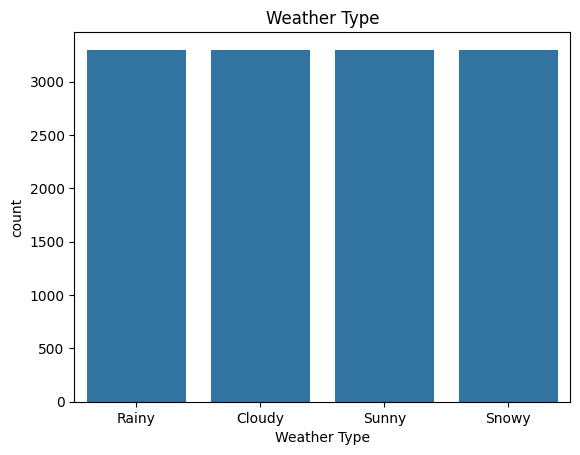

In [ ]:
#coluna de destino
sns.countplot(x=df['Weather Type'])
plt.title('Weather Type');

Percentage % of Weather Type rate is: Weather Type
Rainy     25.0
Cloudy    25.0
Sunny     25.0
Snowy     25.0
Name: count, dtype: float64%


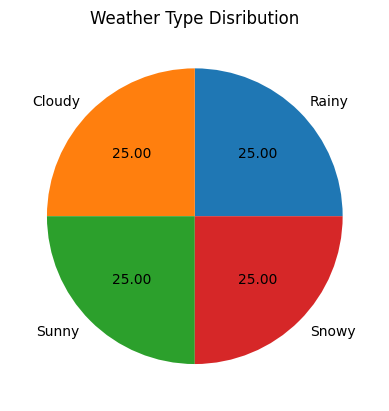

In [ ]:
#Outro gráfico para a coluna "Weather Type"
per = df['Weather Type'].value_counts()/len(df)
print('Percentage % of Weather Type rate is: {}%'.format(per*100))


plt.pie(df.groupby(by=["Weather Type"]).size(), labels = df["Weather Type"].unique(), autopct = "%0.2f")
plt.title('Weather Type Disribution');
plt.show()


In [ ]:
#Mostrar contagens de valores para as colunas categóricas
cat_cols =['Cloud Cover', 'Season', 'Location']


for col in cat_cols:
    d_type = df[col].dtype

    if d_type != "object" and (df[col] > 1).any().any():
        plt.figure(figsize=(8, 4))
        sns.histplot([col], bins=50, kde=True)
        plt.title(f"Distribution of {col}")
        plt.xlabel(f'{col}')
        plt.show()

    counts =df[col].value_counts()
    print(f"Counts for {col}:")
    print(counts)
    print("============================================================")

Counts for Cloud Cover:
Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64
Counts for Season:
Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64
Counts for Location:
Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64


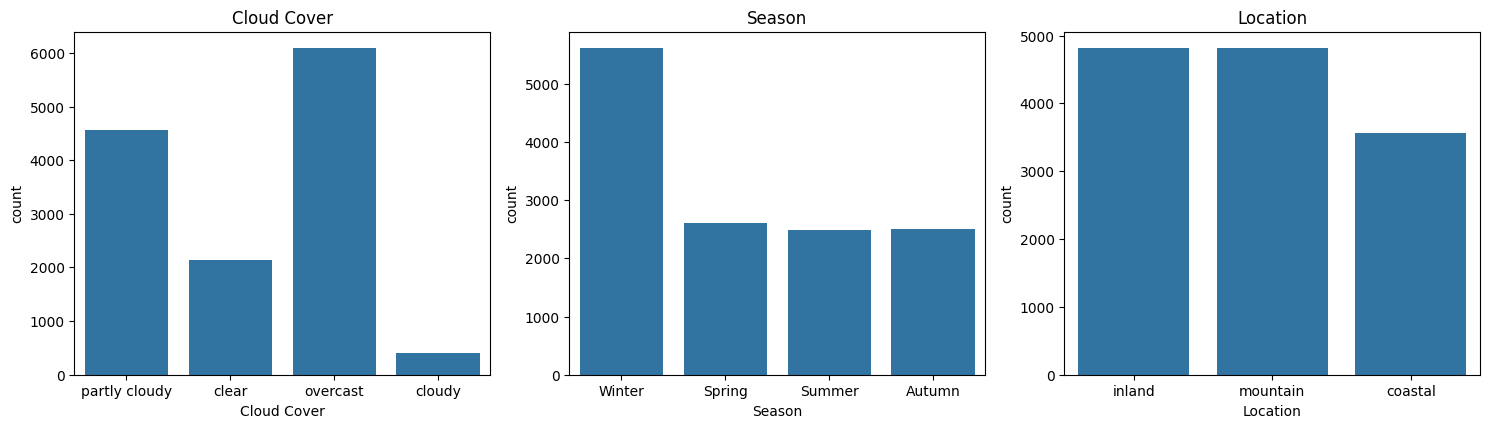

In [ ]:
Categorical=list(df[['Cloud Cover', 'Season', 'Location']])

plt.figure(figsize=(15,20))

for i in range(len(Categorical)):

    plt.subplot(5,3,i+1)
    plt.title(Categorical[i])
    sns.countplot(x=df[Categorical[i]])


plt.tight_layout()
plt.show()

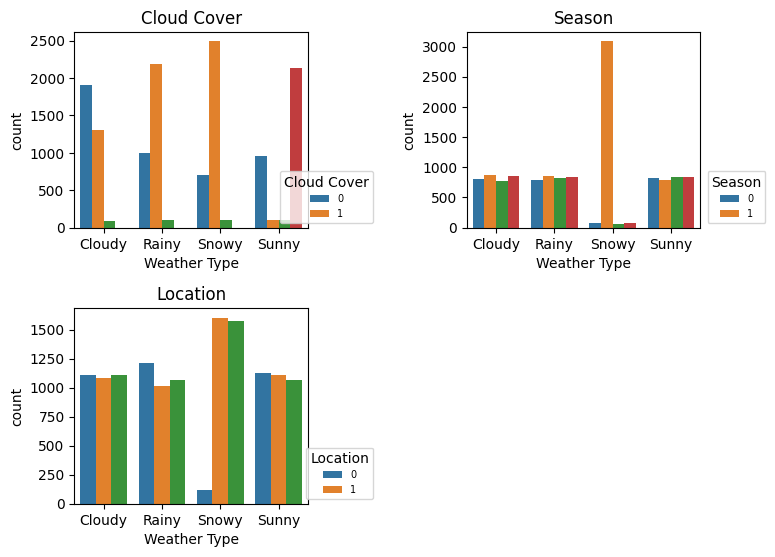

In [ ]:
train_df_finall_sorted=df.sort_values(by='Weather Type')
columns=list(train_df_finall_sorted[['Cloud Cover', 'Season', 'Location']])
plt.figure(figsize=(8,8))
i=0
for col in columns:

    plt.subplot(3,2,i+1)
    sns.countplot(x='Weather Type',data=train_df_finall_sorted,hue=col)
    plt.legend(title=col ,loc='lower right',fontsize='x-small',labels=['0','1'],bbox_to_anchor=(0.8, 0, 0.5, 0))
    plt.title(col)
    i+=1

plt.tight_layout()
plt.show()

In [ ]:
#Mostrar contagens de valores para as colunas numéricas
numerical= ['Temperature','Humidity','Wind Speed','Precipitation (%)','UV Index','Visibility (km)']

for col in numerical:
    d_type = df[col].dtype

    counts =df[col].value_counts()
    print(f"Counts for {col}:")
    print(counts)
    print("============================================================")


Counts for Temperature:
Temperature
32.0     391
24.0     375
26.0     372
30.0     370
22.0     365
        ... 
102.0      1
86.0       1
108.0      1
87.0       1
95.0       1
Name: count, Length: 126, dtype: int64
Counts for Humidity:
Humidity
76     313
60     309
67     295
63     291
70     288
      ... 
100     46
102     42
109     42
103     41
101     36
Name: count, Length: 90, dtype: int64
Counts for Wind Speed:
Wind Speed
8.0     470
9.5     463
9.0     456
6.5     454
6.0     436
       ... 
40.5      2
45.5      1
46.0      1
47.5      1
48.5      1
Name: count, Length: 97, dtype: int64
Counts for Precipitation (%):
Precipitation (%)
19.0     222
14.0     213
16.0     211
18.0     206
17.0     203
        ... 
104.0     41
100.0     39
106.0     38
102.0     38
105.0     37
Name: count, Length: 110, dtype: int64
Counts for UV Index:
UV Index
1     2837
0     2097
2     1465
3     1432
4      831
5      591
11     582
10     577
9      572
7      543
8      532
6      5

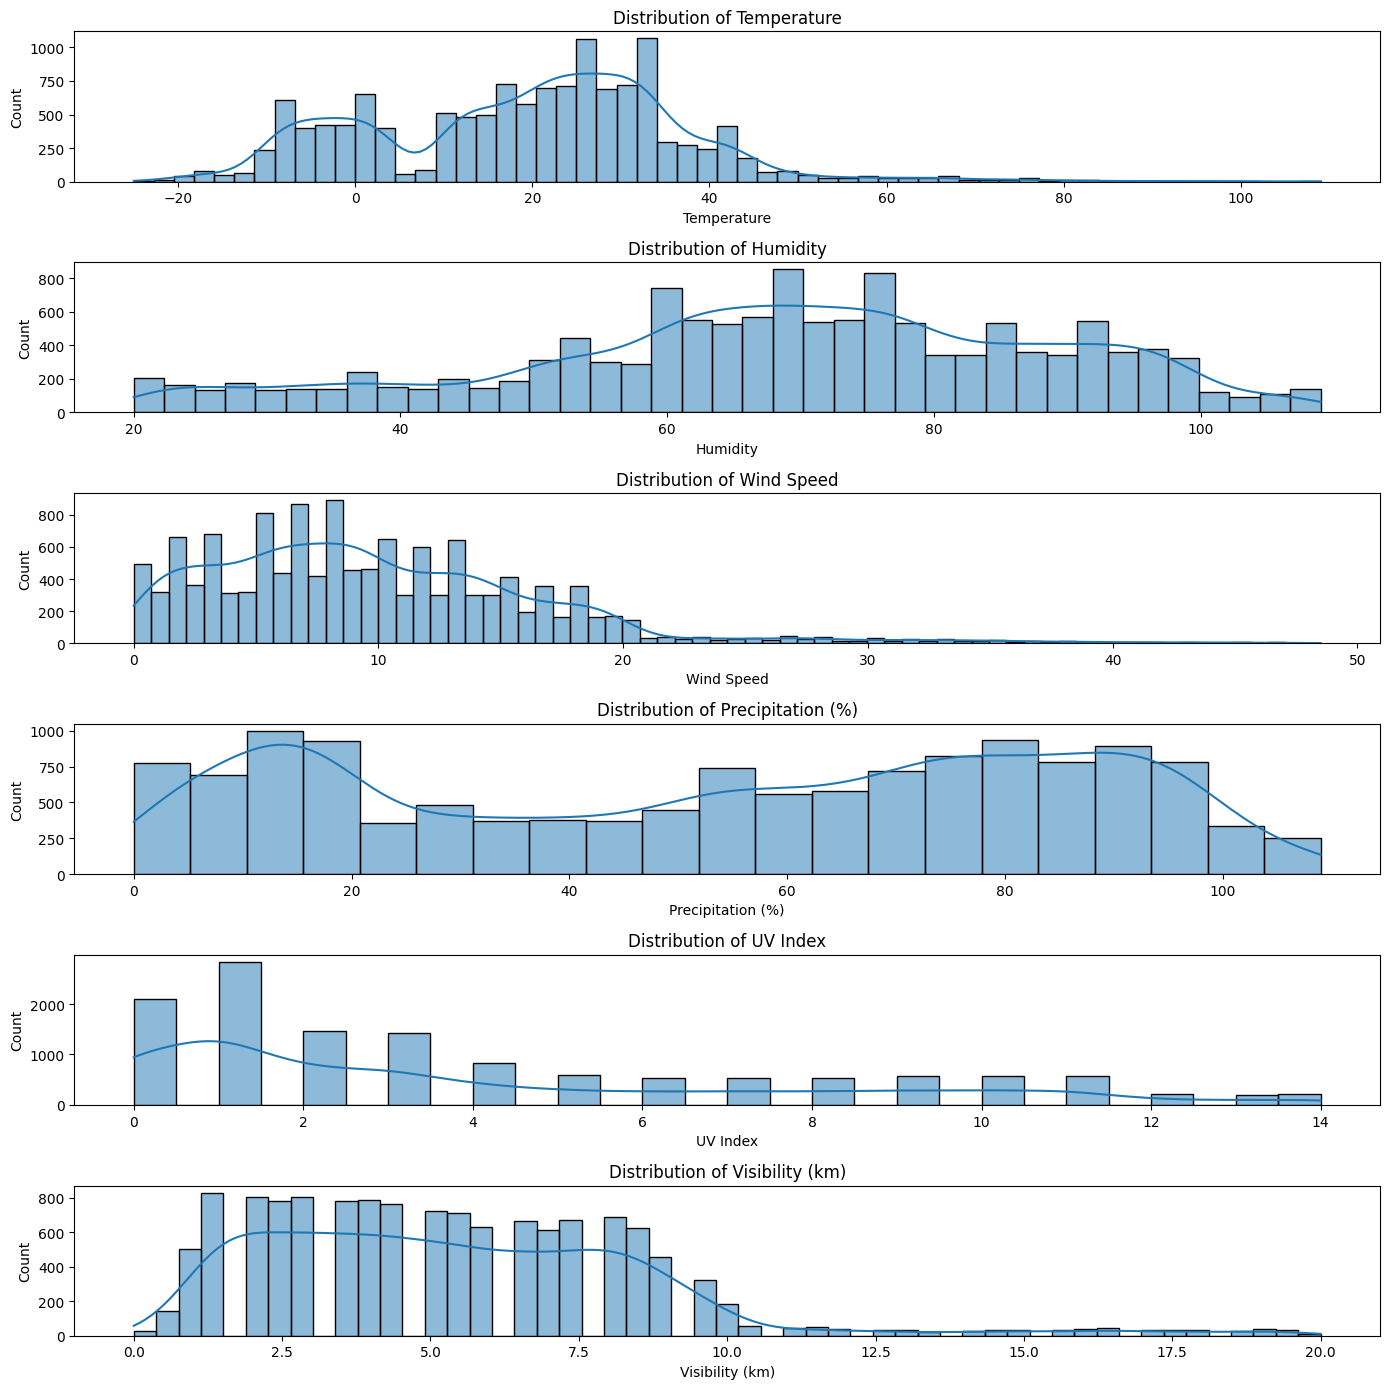

In [ ]:
num_1 = ['Temperature','Humidity','Wind Speed','Precipitation (%)','UV Index','Visibility (km)']
fig, axes = plt.subplots(nrows=len(num_1), ncols=1, figsize=(14, 14))

for i, column in enumerate(num_1):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

observe as médias das variáveis ​​numéricas para a variável Target

In [ ]:
def target_summary_with_num(df, target, numerical_col):
    print(df.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")


for col in num_1:
    target_summary_with_num(df, "Weather Type", col)

              Temperature
Weather Type             
Cloudy          22.823636
Rainy           22.788182
Snowy           -1.530606
Sunny           32.429091


               Humidity
Weather Type           
Cloudy        66.528788
Rainy         78.397879
Snowy         78.510303
Sunny         51.406364


              Wind Speed
Weather Type            
Cloudy          8.601818
Rainy          13.677576
Snowy          10.976212
Sunny           6.073182


              Precipitation (%)
Weather Type                   
Cloudy                40.286364
Rainy                 74.752424
Snowy                 74.586061
Sunny                 24.952727


              UV Index
Weather Type          
Cloudy        3.583939
Rainy         2.684242
Snowy         1.950303
Sunny         7.804545


              Visibility (km)
Weather Type                 
Cloudy               7.071212
Rainy                3.628485
Snowy                3.591515
Sunny                7.560455




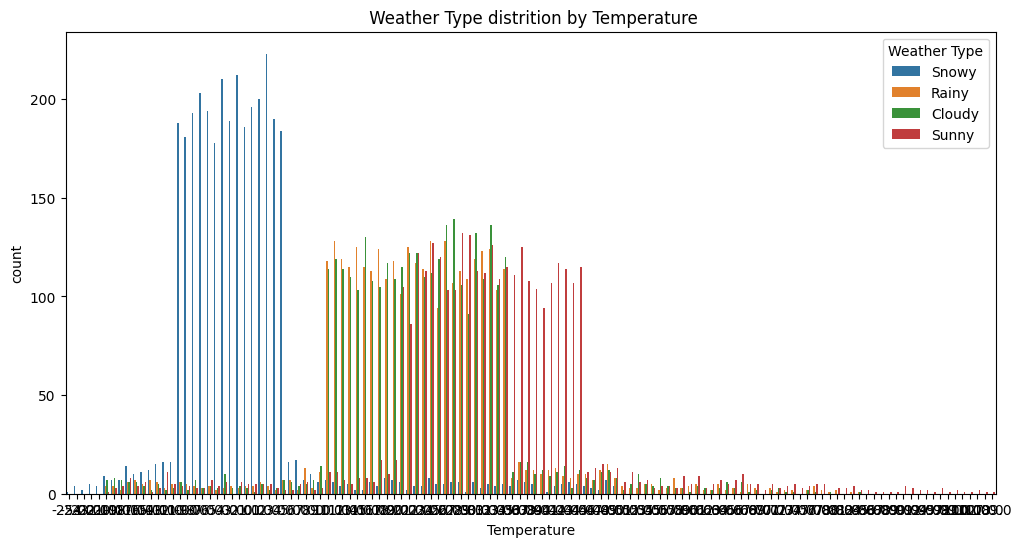

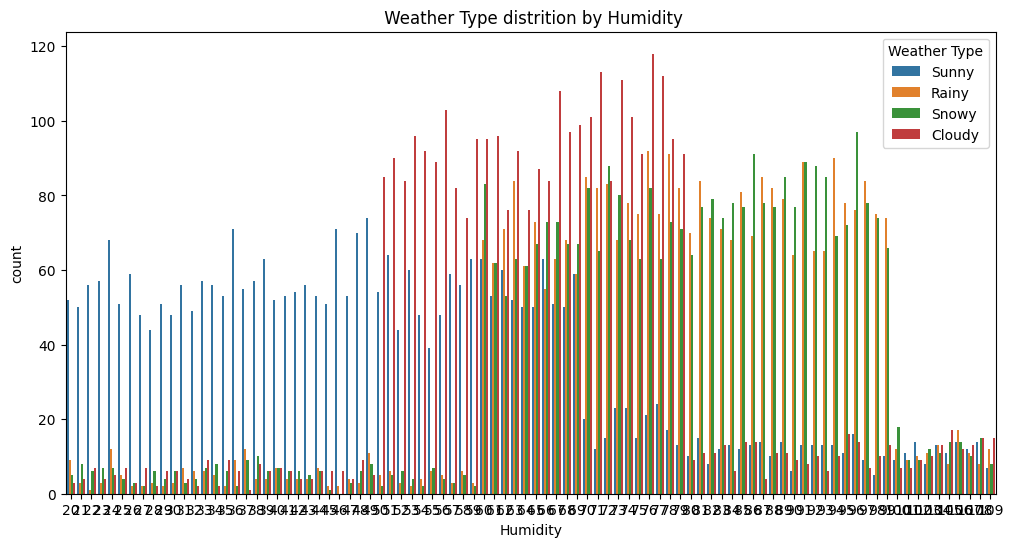

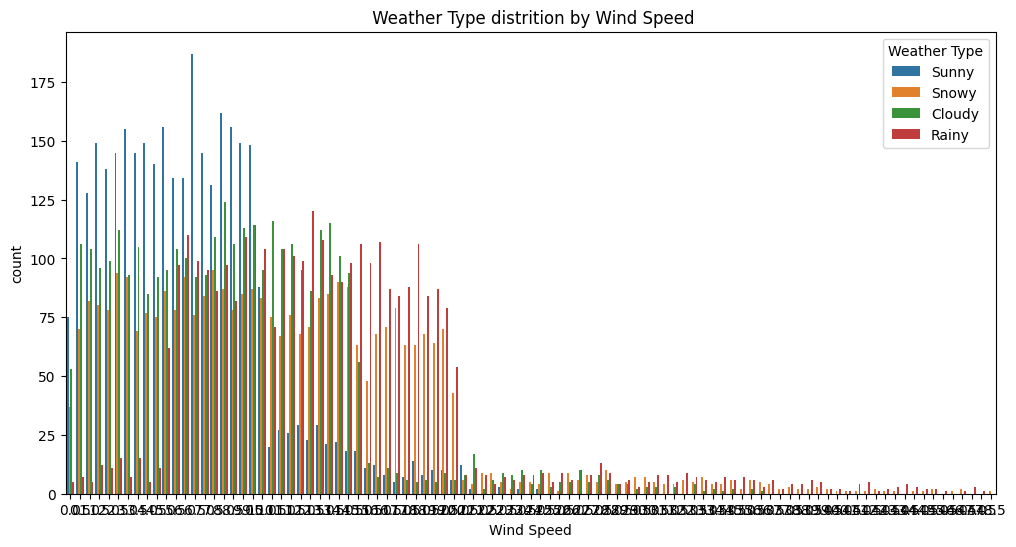

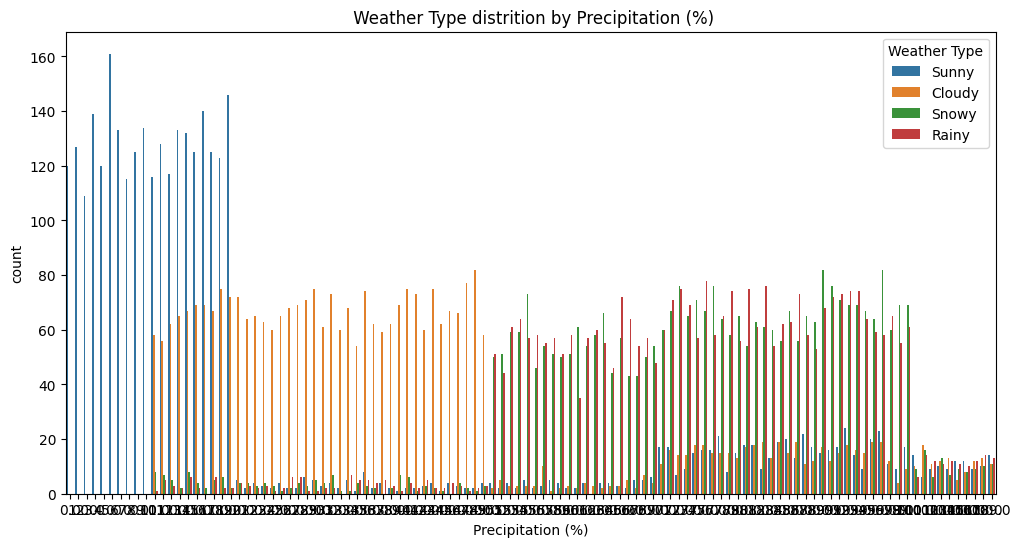

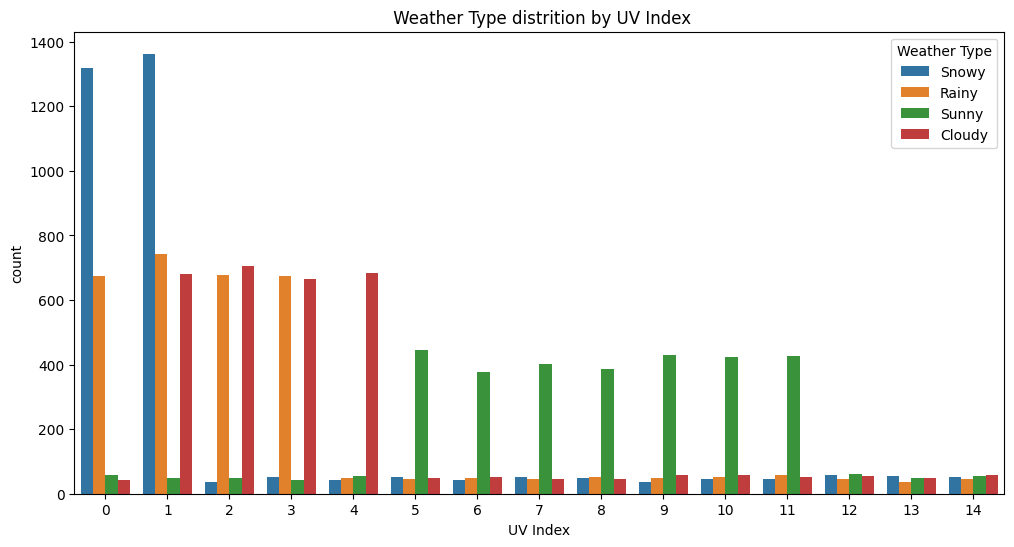

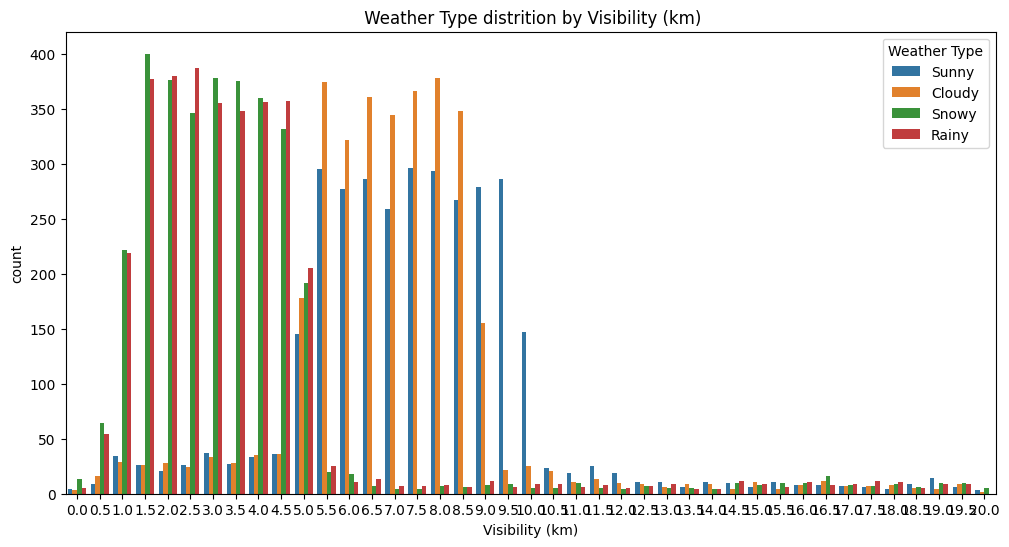

In [ ]:
num_cols = ['Temperature','Humidity','Wind Speed','Precipitation (%)','UV Index','Visibility (km)']

for col in num_cols:
    plt.figure(figsize=(12,6))
    sns.countplot(x=col, hue='Weather Type', data=df)
    plt.title(" Weather Type distrition by " + col)
    plt.show()

In [ ]:
#codificando variáveis ​​categóricas

df = df.copy()
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Dividir o dataframe em X e y

In [ ]:
X=df.drop(columns='Weather Type')
y=df['Weather Type']

#Dividir o dataframe em treinar e testar

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=42)

# Naive Bayes

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)

In [ ]:
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_pred))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

      Cloudy       0.85      0.80      0.82       797
       Rainy       0.84      0.85      0.84       822
       Snowy       0.92      0.93      0.92       865
       Sunny       0.83      0.86      0.84       816

    accuracy                           0.86      3300
   macro avg       0.86      0.86      0.86      3300
weighted avg       0.86      0.86      0.86      3300



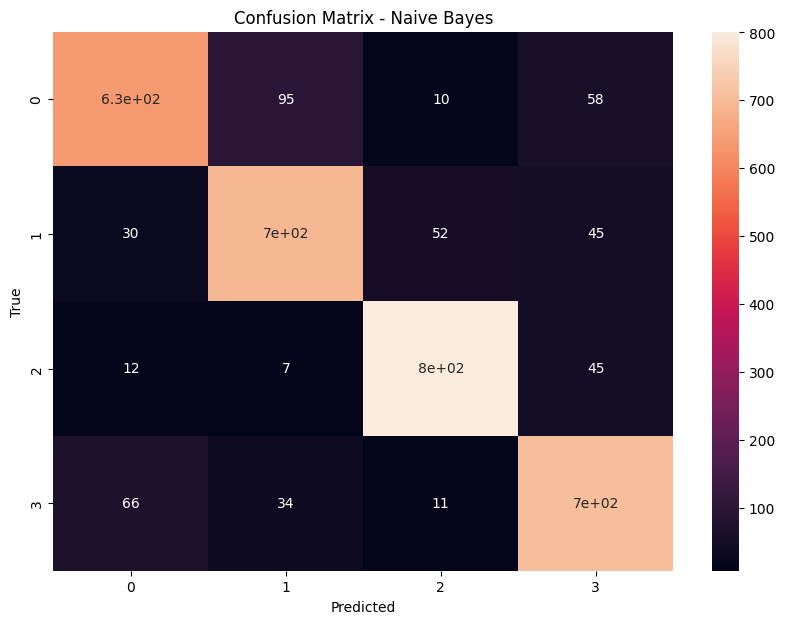

In [ ]:
cm_nb = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm_nb, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# KNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)

In [ ]:
print("KNN Classification Report:")
print(classification_report(y_test, knn_pred))

KNN Classification Report:
              precision    recall  f1-score   support

      Cloudy       0.81      0.85      0.83       797
       Rainy       0.85      0.90      0.87       822
       Snowy       0.94      0.93      0.94       865
       Sunny       0.92      0.82      0.87       816

    accuracy                           0.88      3300
   macro avg       0.88      0.88      0.88      3300
weighted avg       0.88      0.88      0.88      3300



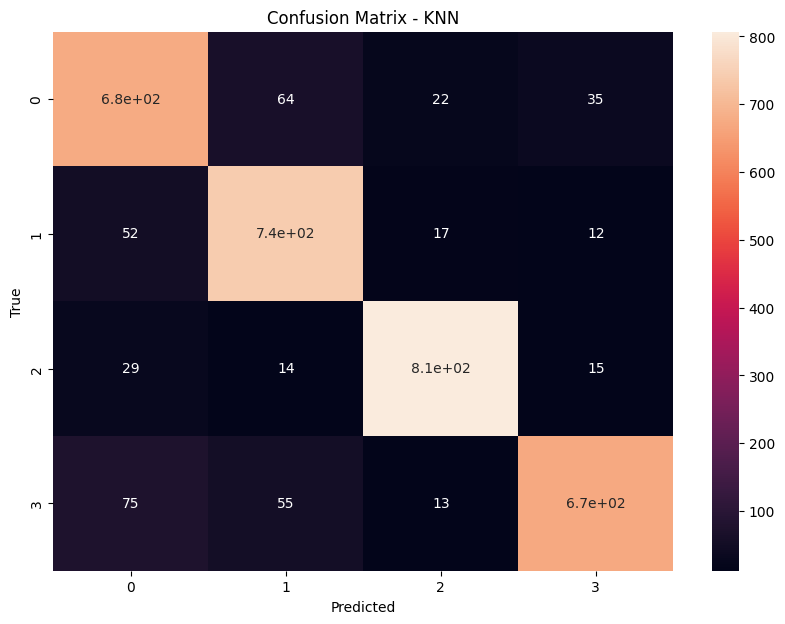

In [ ]:
cm_knn = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm_knn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix - KNN")
plt.show()

# Redes Neurais



In [ ]:
nn_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)
nn_acc = accuracy_score(y_test, nn_pred)

In [ ]:
print("Redes Neurais Classification Report:")
print(classification_report(y_test, nn_pred))

Redes Neurais Classification Report:
              precision    recall  f1-score   support

      Cloudy       0.84      0.86      0.85       797
       Rainy       0.89      0.89      0.89       822
       Snowy       0.94      0.94      0.94       865
       Sunny       0.89      0.86      0.88       816

    accuracy                           0.89      3300
   macro avg       0.89      0.89      0.89      3300
weighted avg       0.89      0.89      0.89      3300



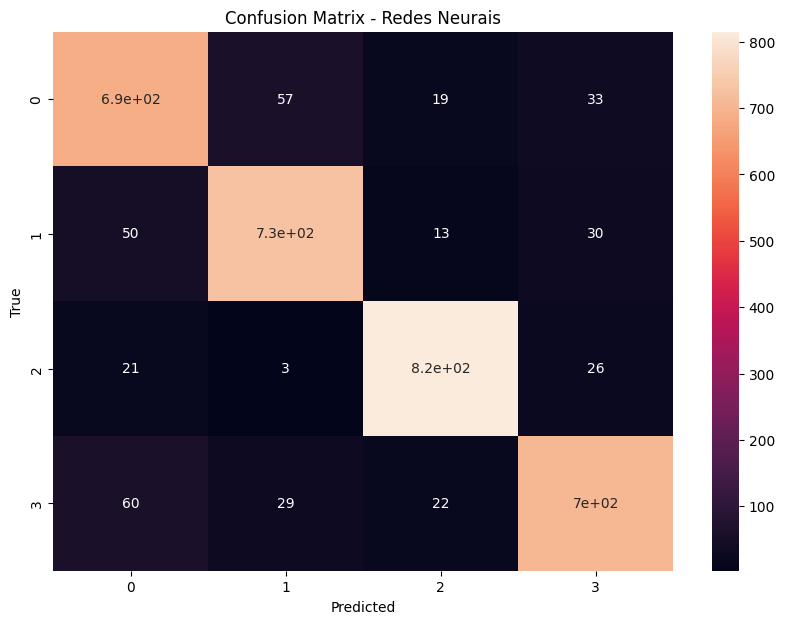

In [ ]:
cm_nn = confusion_matrix(y_test, nn_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm_nn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix - Redes Neurais")
plt.show()

# Pontuações dos modelos

In [ ]:
models = pd.DataFrame({
    'Model': ['Naive Bayes', 'KNN', 'Redes Neurais'],
    'Accuracy': [nb_acc, knn_acc, nn_acc]
})
print(models.sort_values(by='Accuracy', ascending=False))

           Model  Accuracy
2  Redes Neurais  0.890000
1            KNN  0.877879
0    Naive Bayes  0.859091
